###### ECE194N: Homework 3
###### Topics: RNN Problem
###### Due: May 29


-------------------------------------------------

RNN: In this problem we will be implementing an RNN. The objective of the RNN
is that given a sequence of words, it will try to guess the next word. For this task we
will follow the RNN tutorial for Tensorflow which can be found from this link:

https://www.tensorflow.org/tutorials/recurrent


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, math
import tensorflow as tf
import numpy as np
import collections
import os
import argparse
import datetime as dt

import reader
import util


C:\Users\Karma\Anaconda3\envs\tflo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### (a.) Download the data and read the reader code from the tutorial. 

Write a small script that displays the word ids and the sentences for the first 10 samples in the validation set. 
##### Hint: It should be something like this: ”I like apples” [1,2,3] where 1:I, 2:like, 3:apples.

In [2]:
# Read PTB sample data 
data_path = "simple-examples/data/"
word_to_id = reader._build_vocab(os.path.join(data_path, "ptb.train.txt"))
raw_data = reader.ptb_raw_data(data_path)
train_data, valid_data, test_data, vocabulary = raw_data

reversed_dictionary = dict(zip(word_to_id.values(), word_to_id.keys()))
print(" ".join([reversed_dictionary[x] for x in train_data[:10]]))

print("Vocabulary Size: ", vocabulary,"\n")
eos_id = word_to_id["<eos>"]
word_txt = ""
word_ids = []
sent_cnt = 0
for id_valid in valid_data[0:10000]:
    kv = {k:v for k, v in word_to_id.items() if v == id_valid}
    kv = kv.popitem()
    if(id_valid == eos_id): # End of sentence
        print((sent_cnt+1),".)",word_txt,"\n ",word_ids)
        word_txt = ""
        word_ids = []
        sent_cnt = sent_cnt + 1
        continue
    if(sent_cnt == 10):  # Finish after 10 sentences
        break
    # Add word to sentence 
    word_txt = word_txt + " " + kv[0]
    word_ids.append(kv[1])

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec
Vocabulary Size:  10000 

1 .)  consumers may want to move their telephones a little closer to the tv set 
  [1132, 93, 358, 5, 329, 51, 9836, 6, 326, 2476, 5, 0, 662, 388]
2 .)  <unk> <unk> watching abc 's monday night football can now vote during <unk> for the greatest play in N years from among four or five <unk> <unk> 
  [1, 1, 2974, 2158, 9, 381, 1068, 2347, 89, 99, 847, 198, 1, 11, 0, 3383, 1119, 7, 3, 72, 20, 211, 346, 36, 258, 1, 1]
3 .)  two weeks ago viewers of several nbc <unk> consumer segments started calling a N number for advice on various <unk> issues 
  [75, 422, 195, 3917, 4, 249, 1795, 1, 580, 3528, 892, 2374, 6, 3, 297, 11, 2709, 16, 1186, 1, 250]
4 .)  and the new syndicated reality show hard copy records viewers ' opinions for possible airing on the next day 's show 
  [8, 0, 35, 9922, 3747, 464, 710, 2998, 2037, 3917, 134, 6145, 11, 494, 5894, 16, 0, 130, 272, 9, 464]
5 .)  inter

### (b) Create an RNN model following the tutorial. 

- Train the model and save training and validation losses over time. 
- Comment on if your model is overfitting or underfitting. 



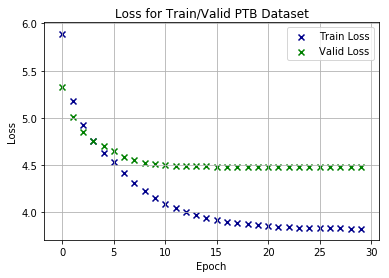

In [10]:
# This part is continued in the ptb_word_lm.py source code 

import matplotlib.pyplot as plt

x = range(0,30)
x_axis =  [5.892828233455839, 5.175063474197051, 4.923602828133515, 4.755605833686223, 4.6317642236554155, 
           4.5337887175386795, 4.4146086716731485, 4.309408576892233, 4.224679030739641, 4.15113995112956, 
           4.091310661546713, 4.042695668270108, 4.002090388723179, 3.9691814252180104, 3.9422283922076957, 
           3.9196188754318784, 3.8993738749990015, 3.8886861031760516, 3.8726353648918055, 3.8653755862305528, 
           3.855408901839226, 3.8485901848083293, 3.8452557702895604, 3.8390576082842127, 3.8360201804934873, 
           3.834563913631778, 3.8339368299668437, 3.830275785865254, 3.8287308164710105, 3.828182678846872]
y_axis = [5.324787410813935, 5.01346401084848, 4.84561486069037, 4.75106652084662, 4.6982585424306444, 
          4.652949011147427, 4.586399453091784, 4.5520516988533695, 4.523064533674798, 4.5084592110770085,
          4.497108386811756, 4.493018537248884, 4.489556033595079, 4.485706998863999, 4.48800402167703, 
          4.485253441220238, 4.485081376056282, 4.482010697345344, 4.483444072697439, 4.482078861573926, 
          4.482794359687234, 4.482575554880155, 4.4811470374282525, 4.480794287441539, 4.480578127491231, 
          4.479583918772587, 4.4784935194781035, 4.478589228415975, 4.478181957841731, 4.477987438383557]

plt.title("Loss for Train/Valid PTB Dataset")
plt.scatter(x, x_axis, color='darkblue', marker='x', label="Train Loss")
plt.scatter(x, y_axis, color='green', marker='x', label="Valid Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.grid(True)
plt.legend()

plt.show()